In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [33]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [34]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
train_data['Credit_History'] = train_data['Credit_History'].astype('object')
test_data['Credit_History'] = test_data['Credit_History'].astype('object')

In [39]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
# Fill null vlaues-train data
train_data['Gender'].fillna('Nil',inplace = True)
train_data['Married'].fillna('Nil',inplace = True)
train_data['Dependents'].fillna('Nil',inplace = True)
train_data['Self_Employed'].fillna('Nil',inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace = True)
train_data['Credit_History'].fillna('Nil',inplace = True)

In [41]:
# Fill null values-test data
test_data['Gender'].fillna('Nil',inplace = True)
test_data['Dependents'].fillna('Nil',inplace = True)
test_data['Self_Employed'].fillna('Nil',inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(),inplace = True)
test_data['Credit_History'].fillna('Nil',inplace = True)

In [42]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [44]:
# Omission of certain categorical columns are  based on chi-square test

numeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
category = ['Married','Dependents','Education','Property_Area','Credit_History']

In [45]:
# Scaling
scaler = StandardScaler()
for i in numeric:
    train_data[i] = scaler.fit_transform(train_data[i].values.reshape(-1,1))
    test_data[i] = scaler.fit_transform(test_data[i].values.reshape(-1,1))

In [46]:
#OneHotEncoding
# .astype(str) is used because pandas data type 'Object' indicates mixed types rather than str type and 
# credit history column contains both float and str
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(train_data[category].astype(str))
onehotlabel_tr = enc.transform(train_data[category].astype(str)).toarray()
onehotlabel_test = enc.transform(test_data[category].astype(str)).toarray()
df1 = pd.DataFrame(data=onehotlabel_tr)
df2 = pd.DataFrame(data=onehotlabel_test)
for i in category:
    train_data.drop(i, axis=1, inplace=True)
    test_data.drop(i, axis=1, inplace=True)

train_data = pd.concat([train_data, df1], axis=1)
test_data = pd.concat([test_data, df2], axis=1)

In [47]:
# Label encoding Loan_Status
label_encoder = preprocessing.LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [48]:
# Omission of certain categorical columns are  based on chi-square test

train_data.drop('Gender', axis=1, inplace=True)
train_data.drop('Self_Employed', axis=1, inplace=True)
test_data.drop('Gender', axis=1, inplace=True)
test_data.drop('Self_Employed', axis=1, inplace=True)


In [49]:
train_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,0,1,2,3,...,6,7,8,9,10,11,12,13,14,15
0,LP001002,0.072991,-0.554487,-0.211241,0.273231,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,LP001003,-0.134412,-0.038732,-0.211241,0.273231,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,LP001005,-0.393747,-0.554487,-0.948996,0.273231,1,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,LP001006,-0.462062,0.251980,-0.306435,0.273231,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,LP001008,0.097728,-0.554487,-0.056551,0.273231,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [50]:
#droping Loan_id
train_data.drop('Loan_ID', axis=1, inplace=True)
Loan_ID = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)

In [51]:
train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,0.072991,-0.554487,-0.211241,0.273231,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.134412,-0.038732,-0.211241,0.273231,0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.393747,-0.554487,-0.948996,0.273231,1,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.462062,0.251980,-0.306435,0.273231,1,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.097728,-0.554487,-0.056551,0.273231,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [52]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.186461,-0.673335,-0.426780,0.266022,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.352692,-0.029848,-0.163953,0.266022,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.039641,0.098849,1.183033,0.266022,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.502774,0.418877,-0.591047,0.266022,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.311909,-0.673335,-0.952433,0.266022,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
# train test split
X = train_data.drop("Loan_Status",axis=1)
Y = train_data["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [54]:
def KNN_tune(X_tr,y_tr,X_cv,y_cv):
    #Setup arrays to store training and cv accuracies
    #np.arange(1,3)-----> array([1, 2])
    neighbors = np.arange(1,26)
    train_accuracy = []
    cv_accuracy = []

    for k in neighbors:
        #Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
    
        #Fit the model
        knn.fit(X_tr, y_tr)
    
        #Compute accuracy on the training set
        train_pred = knn.predict(X_tr)
        acc = accuracy_score(y_tr,train_pred)
        train_accuracy.append(acc)
    
        #Compute accuracy on the crossvalidation set
        cv_pred = knn.predict(X_cv)
        acc = accuracy_score(y_cv,cv_pred)
        cv_accuracy.append(acc)
    return train_accuracy, cv_accuracy

In [55]:
def plot_hyperparam_vs_metric(param,cv_accuracy,train_accuracy):
    plt.title('KNN Varying hyper params')
    plt.plot(param, cv_accuracy, label='Validation ')
    plt.plot(param, train_accuracy, label='Train ')
    plt.legend()
    plt.xlabel('Hyper Parameter')
    plt.ylabel('Accuracy Score')
    plt.show()

In [56]:
train_accuracy,cv_accuracy = KNN_tune(X_train,y_train,X_test,y_test)

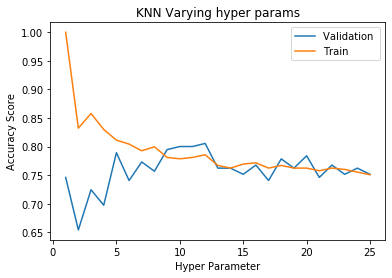

In [57]:
k = np.arange(1,26)
plot_hyperparam_vs_metric(k,cv_accuracy,train_accuracy)

In [58]:
#getting the optimal k
optimal_k_KNN = k[cv_accuracy.index(max(cv_accuracy))]
acc_knn = max(cv_accuracy)
print(optimal_k_KNN,acc_knn)

12 0.8054054054054054


In [59]:
#retrain on full data
knn = KNeighborsClassifier(n_neighbors=optimal_k_KNN)
    
#Fit the model
knn.fit(X,Y)
    
#Compute accuracy on the testing set
pred = knn.predict(test_data)

In [60]:
def mapp(x):
      if x == 1:
        return 'Y'
      else:
        return 'N'
mapped_pred = np.arange(len(pred)).astype('str')
i = 0
while (i < len(pred)):
    mapped_pred[i] = mapp(pred[i])
    i = i+1

In [61]:
d = {'Loan_ID': Loan_ID , 'Loan_Status': mapped_pred}
upload_KNN = pd.DataFrame(d)
upload_KNN.to_csv("upload_KNN_new1.csv",index=False)